### <font color='blue'> MACHINE LEARNING </font>

### Dataset

In [1]:
from pandas import read_csv
# ---------------------------------
import warnings; warnings.filterwarnings('ignore')


# dataset = './datasetCommon.csv'
# dataset = './datasetFull.csv'
dataset = './datasetDummy.csv'
# ---------------------------------
dataframe = read_csv(dataset, sep=';')


dclean = dataframe.copy()
# Remover quem nao fez nenhuma avaliação
dclean = dclean.drop( dclean[(dclean.AV1 == 0) & (dclean.AV2 == 0) & (dclean.AV3 == 0) ].index)
dclean.index = range(dclean.shape[0])  ## Restaurar Index
# ---------------------------------
df = dclean[262:]
df.index = range(df.shape[0])  ## Restaurar Index
# ---------------------------------
df_target = dataframe[:262]
df_target.index = range(df_target.shape[0])  ## Restaurar Index

In [2]:
dataframe.shape, df.shape, df_target.shape

((2897, 31), (2259, 31), (262, 31))

In [3]:
# https://matplotlib.org/examples/color/colormaps_reference.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
# ---------------------------------
# print(plt.style.available)
plt.style.use('default')
# ---------------------------------
def plot_corr(df, size=8, 
              fontweightX='normal', colorX='black', fontsizeX=10, rotationX=90, 
              fontweightY='normal', colorY='black', fontsizeY=10, rotationY=0):
    
    corr = df.corr(method='pearson')
    fig, ax = plt.subplots(figsize = (size, size))
    img = ax.matshow(corr, vmin=-1, vmax=1, cmap = cm.coolwarm, alpha=0.8) #, cmap='hot', cmap='bone', cmap='Blues', cmap='RdBu'
    
    xticklabelsX=dict(fontweight=fontweightX, color=colorX, fontsize=fontsizeX, rotation=rotationX)
    xticklabelsY=dict(fontweight=fontweightY, color=colorY, fontsize=fontsizeY, rotation=rotationY)
    
    ax.set_xticklabels([''] + list(corr.columns), xticklabelsX)
    ax.set_yticklabels([''] + list(corr.columns), xticklabelsY)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tick_params( bottom=False, top=False, left=False, right=False )
    plt.colorbar(img, shrink = 0.82)
    plt.show()

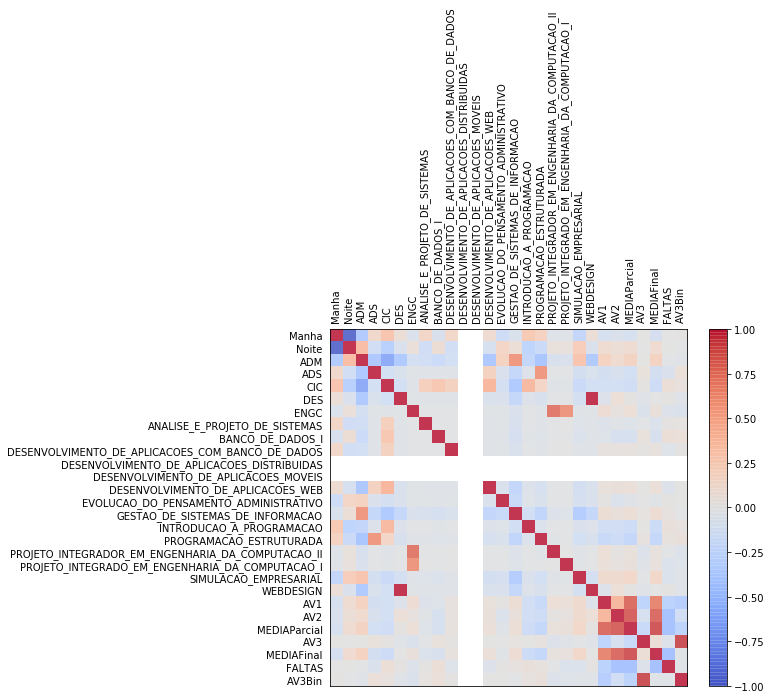

In [4]:
plot_corr(df, size=8, 
          fontweightX='normal', colorX='black', fontsizeX=10, rotationX=90, 
          fontweightY='normal', colorY='black', fontsizeY=10, rotationY=0)

### Balanceamento de Classes


				 Random over-sampling: 	 Random under-sampling:
				 --------------------- 	 ---------------------
Class 0 	 -> 1366 		 1366 			 893
Class 1 	 ->  893 		 1366 			 893
Proportion 	 -> 1.53 : 1



[None, None, None, None, None, None, None, None, None, None, None, None]

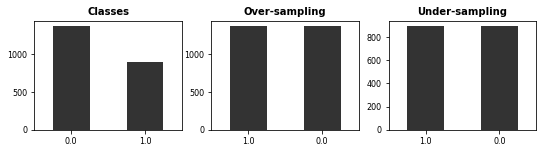

In [5]:
from pandas import concat


# Class count
count_class_0, count_class_1 = df.AV3Bin.value_counts()

# Divide by class
df_class_0 = df[ df.AV3Bin == 0 ]
df_class_1 = df[ df.AV3Bin == 1 ]


# Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_under_sampling = concat([df_class_0_under, df_class_1], axis=0)

# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over_sampling = concat([df_class_0, df_class_1_over], axis=0)


print('\n\t\t\t\t Random over-sampling: \t Random under-sampling:')
print('\t\t\t\t --------------------- \t ---------------------')
print('Class 0 \t ->', count_class_0, '\t\t' ,df_over_sampling.AV3Bin.value_counts()[0], '\t\t\t' ,df_under_sampling.AV3Bin.value_counts()[0])
print('Class 1 \t -> ', count_class_1, '\t\t' ,df_over_sampling.AV3Bin.value_counts()[1], '\t\t\t' ,df_under_sampling.AV3Bin.value_counts()[1])
print('Proportion \t -> %.2f' %( count_class_0 / count_class_1 ), ': 1\n')
# print()


(fig, axes) = plt.subplots(nrows=1, ncols=3, figsize=(9, 2))

markerTitle = dict(fontweight='bold', fontsize=10, color='black')
markerTick = dict(fontweight='normal', fontsize=8, color='black', rotation=0)

df.AV3Bin.value_counts().plot(ax=axes[0], kind='bar', color='0.2') #, title='Classes', rot=0), # fontsize=fontsize, color='black')
axes[0].set_title('Classes', **markerTitle)
plt.setp(axes[0].get_xticklabels(), **markerTick)
plt.setp(axes[0].get_yticklabels(), **markerTick)
# ---------------------------------
df_over_sampling.AV3Bin.value_counts().plot(ax=axes[1], kind='bar', color='0.2')
axes[1].set_title('Over-sampling', **markerTitle)
plt.setp(axes[1].get_xticklabels(), **markerTick)
plt.setp(axes[1].get_yticklabels(), **markerTick)
# ---------------------------------
df_under_sampling.AV3Bin.value_counts().plot(ax=axes[2], kind='bar', color='0.2')
axes[2].set_title('Under-sampling', **markerTitle)
plt.setp(axes[2].get_xticklabels(), **markerTick)
plt.setp(axes[2].get_yticklabels(), **markerTick)
# ---------------------------------

### Divisão dos Dados de Treino e Teste

In [6]:
## Data 
# ------------- TURNO -------------
# ['Noite', 'Manha']
# --------------------------------- 
# ------------- CURSO ------------- 
# ['ADM', 'CIC', 'DES', 'ENGC', 'ADS'],
# --------------------------------- 
# ----------- DISCIPLINA ---------- 
# ['GESTAO_DE_SISTEMAS_DE_INFORMACAO', 'DESENVOLVIMENTO_DE_APLICACOES_MOVEIS', 
#  'DESENVOLVIMENTO_DE_APLICACOES_COM_BANCO_DE_DADOS', 'DESENVOLVIMENTO_DE_APLICACOES_DISTRIBUIDAS',
#  'WEBDESIGN', 'PROJETO_INTEGRADO_EM_ENGENHARIA_DA_COMPUTACAO_I', 'PROGRAMACAO_ESTRUTURADA',
#  'BANCO_DE_DADOS_I', 'PROJETO_INTEGRADOR_EM_ENGENHARIA_DA_COMPUTACAO_II', 'SIMULACAO_EMPRESARIAL',
#  'DESENVOLVIMENTO_DE_APLICACOES_WEB', 'EVOLUCAO_DO_PENSAMENTO_ADMINISTRATIVO',
#  'INTRODUCAO_A_PROGRAMACAO', 'ANALISE_E_PROJETO_DE_SISTEMAS']
# --------------------------------- 
# ['AV1', 'AV2', 
#  'MEDIAParcial', 
#  'AV3', 
#  'MEDIAFinal', 
#  'FALTAS']
# --------------------------------- 
# ------------ TARGET -------------
# ['AV3Bin']
# --------------------------------- 

# PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'AV3', 'MEDIAFinal', 'FALTAS',
#            'TURNO', 'CURSO', 'DISCIPLINA']
# TARGET = ['AV3Bin']

# --------------------------------- 
# --------------------------------- 

def Data(data, PREDICT=[], TARGET = []):
    # One Hot Encoding
    turno = data.iloc[:,2:4]
    curso = data.iloc[:,4:9]
    disciplina = data.iloc[:,9:23]

    col_av1 = list(data.columns[24:25])
    col_av2 = list(data.columns[25:26])
    col_mediaparcial = list(data.columns[26:27])
    col_av3 = list(data.columns[27:28])
    col_mediafinal = list(data.columns[28:29])
    col_faltas = list(data.columns[29:30])
    col_av3bin = list(data.columns[-1:])

    col_turno = list(turno.columns)
    col_curso = list(curso.columns)
    col_disciplina = list(disciplina.columns)

    P = []
    T = []
    for ii in PREDICT:
        if ii == 'AV1':          P += col_av1
        if ii == 'AV2':          P += col_av2
        if ii == 'MEDIAParcial': P += col_mediaparcial
        if ii == 'AV3':          P += col_av3
        if ii == 'MEDIAFinal':   P += col_mediafinal
        if ii == 'FALTAS':       P += col_faltas
        ## One Hot Encoding
        if ii == 'TURNO':        P += col_turno
        if ii == 'CURSO':        P += col_curso
        if ii == 'DISCIPLINA':   P += col_disciplina
        ## Target
        if ii == 'AV3Bin':       P += col_av3bin
    # --------------------------------- 
    for ii in TARGET:
        if ii == 'AV1':          T += col_av1
        if ii == 'AV2':          T += col_av2
        if ii == 'MEDIAParcial': T += col_mediaparcial
        if ii == 'AV3':          T += col_av3
        if ii == 'MEDIAFinal':   T += col_mediafinal
        if ii == 'FALTAS':       T += col_faltas
        ## One Hot Encoding
        if ii == 'TURNO':        T += col_turno
        if ii == 'CURSO':        T += col_curso
        if ii == 'DISCIPLINA':   T += col_disciplina
        ## Target
        if ii == 'AV3Bin':       T += col_av3bin
    # --------------------------------- 
    return df[P], df[T]


## Select Data
# data = df
# data = df_under_sampling
data = df_over_sampling


# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'AV3', 'MEDIAFinal', 'FALTAS',
#                        'TURNO', 'CURSO', 'DISCIPLINA'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])

# X, y = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])

# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X, y = Data(data, PREDICT = ['AV1', 'AV2','DISCIPLINA'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2','CURSO'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2','TURNO'], TARGET = ['AV3Bin'])
# # ---------------------------------                                                 
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS'], TARGET = ['AV3Bin'])
X, y = Data(data, PREDICT = ['AV1', 'AV2'], TARGET = ['AV3Bin'])
# # ---------------------------------                                                 
# X, y = Data(data, PREDICT = ['FALTAS'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['MEDIAParcial'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV2'], TARGET = ['AV3Bin'])
# X, y = Data(data, PREDICT = ['AV1'], TARGET = ['AV3Bin'])


## Train Test Split
# -----------------
from sklearn.model_selection import train_test_split
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=1)

### Modelos

In [7]:
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.linear_model import LogisticRegressionCV   # Regressão Logística
from sklearn.tree import DecisionTreeClassifier         # Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from xgboost import XGBClassifier                       # XGBoost
from sklearn.svm import SVC                             # SVM
from sklearn.neural_network import MLPClassifier        # Redes Neurais
# ------------------------------- 
from sklearn.model_selection import train_test_split, cross_val_score, \
                                    RandomizedSearchCV, KFold, RepeatedKFold
from sklearn.metrics import accuracy_score


## Models Create
# --------------

## Random Search
model = ExtraTreesClassifier(n_estimators = 50, random_state=1)
param_dist = {'max_depth': [1,3,5,7,8,10,12,15,None],
              'min_samples_split': [8,10,11,14,16,19],
              'min_samples_leaf': [1,2,3,4,5,6,7],
              'bootstrap': [True, False],
              'criterion': ['gini','entropy']}
rsearch = RandomizedSearchCV(estimator=model, param_distributions = param_dist, n_iter = 25)
rsearch.fit(X_train, y_train)

## Models
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegressionCV()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('CART2', DecisionTreeClassifier(max_depth=None,
                                       max_features=None,
                                       criterion='gini',
                                       min_samples_leaf=1,
                                       min_samples_split=2))) # entropy, gini
models.append(('SVM', SVC())) # kernel = 'rbf', linear, sigmoid, poly, precomputed
models.append(('RF', RandomForestClassifier()))
models.append(('RF2', RandomForestClassifier(n_estimators=10)))

models.append(('EXT', ExtraTreesClassifier()))
models.append(('EXT2', ExtraTreesClassifier(n_estimators = 10)))

models.append(('EXT_', rsearch.best_estimator_))

models.append(('RSr_', rsearch))

models.append(('GB', GradientBoostingClassifier()))
models.append(('GB2', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3))) #, random_state=1

models.append(('XGB', XGBClassifier()))
models.append(('RNN', MLPClassifier()))
models.append(('RNN2', MLPClassifier(max_iter=1000,
                          tol=0.000001,
                          hidden_layer_sizes=(100,100),
                          activation='relu',
                          verbose=False)))
# ---------------------
## End -> Models Create


names = []
accuracy_model = {}   # Accuracy
cv_results_model = {} # Cross Validation
cvR_results_model = {} # Repeated Crooss Validation
results = []
resultsR = []

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
kfoldR = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for name, model in models:
    names.append(name)
    # --- Cross Validation ---
    cv_results = cross_val_score(model, X, y, cv = kfold, scoring='accuracy')
    cv_results_model.update( { name:'%.2f'%(cv_results.mean()*100) } )
    results.append(cv_results)
    
    # --- Repeated Cross Validation ---
    cvR_results = cross_val_score(model, X, y, cv = kfoldR, scoring='accuracy')
    cvR_results_model.update( { name:'%.2f'%(cvR_results.mean()*100) } )
    resultsR.append(cvR_results)    
    
    # --- Accuracy ---
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict)
#     accuracy_model.update({name:round((accuracy*100),2)})
    accuracy_model.update( { name: '%.2f'%(accuracy*100) } )
    

sort_ac = sorted(accuracy_model.items(), key=lambda t:t[1], reverse=True)   # t:t[0] -> Ordem por Chave
sort_cv = sorted(cv_results_model.items(), key=lambda t:t[1], reverse=True) # t:t[1] -> Ordem por Valor
sort_cvR = sorted(cvR_results_model.items(), key=lambda t:t[1], reverse=True) # t:t[1] -> Ordem por Valor

print('Accuracy \t   | Cross Validation \t   | Repeated Cross Validation')
print('---------------------------------------------------------------------- ')
for ii in range(len(models)): print( sort_ac[ii][0],'\t:',sort_ac[ii][1],
                                    '   |',
                                     sort_cv[ii][0],'\t:',sort_cv[ii][1],
                                    '   |',
                                     sort_cvR[ii][0],'\t:',sort_cvR[ii][1]
                                    )

Accuracy 	   | Cross Validation 	   | Repeated Cross Validation
---------------------------------------------------------------------- 
RSr_ 	: 89.68    | EXT_ 	: 87.52    | EXT_ 	: 87.37
SVM 	: 89.38    | RSr_ 	: 87.34    | SVM 	: 87.21
EXT_ 	: 89.09    | SVM 	: 87.12    | RSr_ 	: 87.11
GB 	: 87.46    | GB 	: 87.12    | XGB 	: 86.88
XGB 	: 87.32    | XGB 	: 86.99    | GB 	: 86.65
RNN 	: 85.69    | RNN2 	: 86.32    | RNN2 	: 86.58
RF 	: 85.55    | RNN 	: 85.57    | RNN 	: 85.44
RNN2 	: 84.96    | RF 	: 84.51    | RF2 	: 84.32
RF2 	: 84.51    | GB2 	: 84.33    | RF 	: 84.24
GB2 	: 84.22    | EXT2 	: 84.29    | GB2 	: 84.11
EXT 	: 83.78    | EXT 	: 84.11    | EXT 	: 83.99
EXT2 	: 83.78    | RF2 	: 83.84    | EXT2 	: 83.96
CART 	: 83.63    | CART2 	: 83.09    | CART2 	: 82.86
CART2 	: 83.48    | CART 	: 83.00    | CART 	: 82.81
NB 	: 71.09    | NB 	: 75.08    | NB 	: 75.19
LR 	: 63.72    | LR 	: 64.94    | LR 	: 64.92


In [8]:
import matplotlib.pyplot as plt
# ------------------------------- 
# print(plt.style.available)
# plt.style.use('seaborn')
plt.style.use('default')


def boxplotColor(data, title='title="Type the title here"', fontsize_title=12, fontweight_title='normal', 
                 ticklabelsX=None, ticklabelsY=None, 
                 fontweight='normal', color='black', fontsize_ticklabels=12, rotation=0, 
                 colorLines='dimgrey', line=1.5):
    # --------------------------------- 
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title, fontsize=fontsize_title, fontweight=fontweight_title, color=colorLines)
    ax = fig.add_subplot(111)
    # --------------------------------- 
    if(ticklabelsX):
        ax.set_xticklabels(ticklabelsX, fontweight=fontweight, color=color, fontsize=fontsize_ticklabels, rotation=rotation)
    else:
        plt.setp(ax.get_xticklabels(), fontweight=fontweight, color=color, fontsize=fontsize_ticklabels, rotation=rotation)
        
    if(ticklabelsY):
        ax.set_yticklabels(ticklabelsY, fontweight=fontweight, color=color, fontsize=fontsize_ticklabels, rotation=rotation)
    else:
        plt.setp(ax.get_yticklabels(), fontweight=fontweight, color=color, fontsize=fontsize_ticklabels, rotation=rotation)
    # ---------------------------------
#     ax.tick_params(axis='x', colors=tick_params_colors, labelsize=tick_params_labelsize)
#     ax.tick_params(axis='y', colors=tick_params_colors, labelsize=tick_params_labelsize)
#     ax.set_ylim(( round(min(results)*0.97, 2) , round(max(results)*1.03, 2) ))
    # --------------------------------- 
    markerGrid = dict(linestyle='-.', color='darkgrey', linewidth=1.2, alpha=0.8)
    ax.grid(**markerGrid)
    # --------------------------------- 
    color = []
    colors = ['pink','lightsalmon','rosybrown','tan','darkkhaki','lightgreen','cyan','cadetblue','lightblue']
    bplot = plt.boxplot(data, showfliers=True, widths=0.7, patch_artist=True, showmeans=False)
    for boxes in bplot['boxes']: boxes.set(color=colorLines, linewidth=line)
    for whiskers in bplot['whiskers']: whiskers.set(color=colorLines, linewidth=line)
    for caps in bplot['caps']: caps.set(color=colorLines, linewidth=line)
    for median in bplot['medians']: median.set(color=colorLines, linewidth=line)
    for means in bplot['means']: means.set(marker='o', markerfacecolor=colorLines)
    for fliers in bplot['fliers']: fliers.set(marker='o', markerfacecolor='red', linewidth=line, alpha=0.5)
    [[ color.append(cc) for cc in colors ] for c in range(int(len(data) / len(colors))) ]
    [ color.append(colors[c]) for c in range(int(len(data) % len(colors))) ]
    [ box.set_facecolor(c) for box, c in zip(bplot['boxes'], color) ]

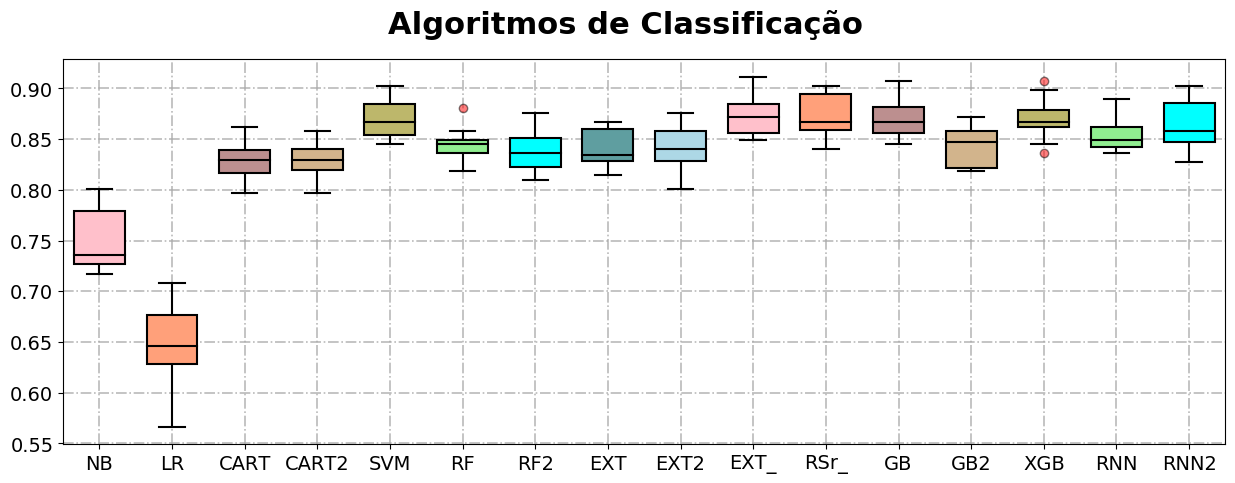

In [9]:
boxplotColor(data=results, title='Algoritmos de Classificação', fontsize_title=22, fontweight_title='bold', 
             ticklabelsX=names, ticklabelsY=None,
             fontweight='normal', color='black', fontsize_ticklabels=14, rotation=0, 
             colorLines='black', line=1.5, 
            )

In [10]:
models

[('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('LR', LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                       fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                       max_iter=100, multi_class='warn', n_jobs=None,
                       penalty='l2', random_state=None, refit=True, scoring=None,
                       solver='lbfgs', tol=0.0001, verbose=0)),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('CART2',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_lea

### Dados novos

In [11]:
data = df_target

# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'AV3', 'MEDIAFinal', 'FALTAS',
#                        'TURNO', 'CURSO', 'DISCIPLINA'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2','TURNO','CURSO','DISCIPLINA'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])

# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])

# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','CURSO'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS','TURNO'], TARGET = ['AV3Bin'])
# # --------------------------------- 
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2','DISCIPLINA'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2','CURSO'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2','TURNO'], TARGET = ['AV3Bin'])
# # ---------------------------------                                                 
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'MEDIAParcial', 'FALTAS'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial', 'FALTAS'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2', 'FALTAS'], TARGET = ['AV3Bin'])
X_predict, y_target = Data(data, PREDICT = ['AV1', 'AV2'], TARGET = ['AV3Bin'])
# # ---------------------------------                                                 
# X_predict, y_target = Data(data, PREDICT = ['FALTAS'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['MEDIAParcial'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV2'], TARGET = ['AV3Bin'])
# X_predict, y_target = Data(data, PREDICT = ['AV1'], TARGET = ['AV3Bin'])


### Selecionar e treinar o melhor modelo

In [12]:
import pickle

## Selecionar melhor modelo
for model in models:
    if sort_ac[0][0] == model[0]:
        bestmodel = model[1]
        
bestmodel.fit(X, y) # treinamento com o modelo selecionado em todos os dados

## Salvar o Modelo
arq = './modelo.sav'
pickle.dump(bestmodel, open(arq, 'wb'))

# predict = bestmodel.predict(X_predict)  # Aplicação do modelo em dados novos
# acc = accuracy_score(y_target, predict) # Acurácia
# print('%.2f'%( acc *100),'%') # Accuracy

In [13]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# ---------------------------------

predict = bestmodel.predict(X_predict)  # Aplicação do modelo em dados novos
matrix = confusion_matrix(y_target, predict)


def plotMatrix(conf_mat=matrix, figsize=(3,3), 
               title='Confusion Matrix', fontsize_title=12, fontweight_title='normal', 
               tick_labels=None, tick_fontweight='normal', tick_color='black', tick_fontsize=10, 
               xlabel='Predicted', ylabel='Expected',fontweight='normal', color='black', fontsize=10):
    
    (fig, ax) = plot_confusion_matrix(conf_mat = matrix, 
                                      show_normed = True,
                                      figsize = figsize)
    
    fig.suptitle(title, fontsize=fontsize_title, fontweight=fontweight_title)
    
    if (tick_labels):
        ax.set_xticklabels([''] + tick_labels, fontweight=tick_fontweight, color=tick_color, fontsize=tick_fontsize)
        ax.set_yticklabels([''] + tick_labels, fontweight=tick_fontweight, color=tick_color, fontsize=tick_fontsize)
    else:
        plt.setp(ax.get_xticklabels(), fontweight=tick_fontweight, color=tick_color, fontsize=tick_fontsize)
        plt.setp(ax.get_yticklabels(), fontweight=tick_fontweight, color=tick_color, fontsize=tick_fontsize)
    
    ax.set_xlabel(xlabel=xlabel,fontweight=fontweight, color=color, fontsize=fontsize)
    ax.set_ylabel(ylabel=ylabel,fontweight=fontweight, color=color, fontsize=fontsize)

Accuracy: 88.05 %

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50, n_jobs=None,
                                                  oob

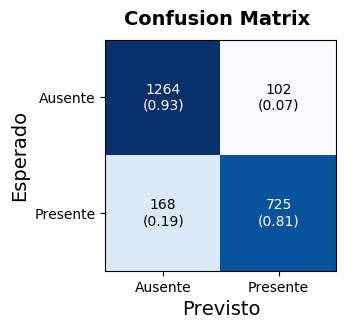

In [14]:
score = bestmodel.score(X_predict, y_target)
print('Accuracy: %.2f'%( score *100),'%\n') # Accuracy

print(bestmodel)

# plotMatrix()
plotMatrix(conf_mat=matrix, figsize=(3,3), 
               title='Confusion Matrix', fontsize_title=14, fontweight_title='bold', 
               tick_labels=['Ausente','Presente'], tick_fontweight='normal', tick_color='black', tick_fontsize=10, 
               xlabel='Previsto', ylabel='Esperado',fontweight='normal', color='black', fontsize=14)

In [15]:
# from sklearn.metrics import classification_report

# report = classification_report(y_target, predict)
# print('\nClassification Report:\n {}'.format(report))

### Carregar o Modelo Salvo e fazer  novas previsões

In [16]:
# print(df_target.Turma.drop_duplicates())

## Separar turma
XX = df_target[ df_target.Turma == df_target.Turma.drop_duplicates()[0] ][['AV1','AV2']].values


## Carregar o Modelo Salvo
model_load = pickle.load(open(arq, 'rb'))

score = model_load.score(X_predict, y_target)
print('Accurácia: %.2f'%( score *100),'%') # Accuracy


## Previsões
mp = model_load.predict(XX)

# from collections import Counter
# Counter(mp)

print('Fará a prova \t:', list(mp).count(0), '->', '%.2f'%(list(mp).count(0)/len(mp)*100)+'%' )
print('Não fará \t:', list(mp).count(1), '->', '%.2f'%(list(mp).count(1)/len(mp)*100)+'%' )
print('Total da Turma \t:', len(mp), '->', '%.2f'%(len(mp)/len(mp)*100)+'%' )

Accurácia: 88.05 %
Fará a prova 	: 60 -> 72.29%
Não fará 	: 23 -> 27.71%
Total da Turma 	: 83 -> 100.00%
